#  Data Cleaning

Let's start with getting the datafiles rounds.csv and companies.txt.


# 1- Importing Key Modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# 2- Loading Data

In [3]:
# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
print(rounds.shape)
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
print(companies.shape)

(114949, 6)
(66368, 10)


In [4]:
#for sector information
mapping=pd.read_csv('mapping.csv')
mapping.shape

(688, 10)

In [5]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [6]:
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [7]:
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


# Task 1: Data Cleaning

#### How many unique companies are present in rounds2?

In [8]:
len(rounds.company_permalink.value_counts())

90247

#### How many unique companies are present in companies?

In [9]:
len(companies.permalink.value_counts())

66368

In [10]:
# or 
companies.permalink.nunique()

66368

#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.


In [11]:
companies.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN


*permalink*

#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [12]:
companies.permalink.nunique()

66368

In [13]:
rounds.company_permalink.nunique()

90247

In [14]:
# companies present in rounds file but not in (~) companies file
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


There is a mismatch. Let's convert these string into lower case

In [15]:
companies['permalink'] = companies['permalink'].str.lower()

In [16]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [17]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()

In [18]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [19]:
print(companies.permalink.nunique())
print(rounds.company_permalink.nunique())

66368
66370


Now we have only two mismatches. Let's check again those exact points  (index) where we have different values.

In [20]:
# companies present in rounds file but not in (~) companies file
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [21]:
# looking at the indices with weird characters
rounds_original = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds_original.iloc[[29597, 31863, 45176, 58473], :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0


The company weird characters appear when you import the data file. To confirm whether these characters are actually present in the given data or whether python has introduced them while importing into pandas, let's have a look at the original CSV file in Excel.

Thus, this is most likely a data quality issue we have introduced while reading the data file into python. Specifically, this is most likely caused because of encoding.

First, let's try to figure out the encoding type of this file. Then we can try specifying the encoding type at the time of reading the file. The ```chardet``` library shows the encoding type of a file.

In [22]:
import chardet

rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1254


In [23]:
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


Now let's try telling pandas (at the time of importing) the encoding type. Here's a list of various encoding types python can handle: https://docs.python.org/2/library/codecs.html#standard-encodings.

In [24]:
# trying different encodings
encoding="cp1254"
rounds_original = pd.read_csv("rounds2.csv", encoding="cp1254")
rounds_original.iloc[[29597, 31863, 45176], :]

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 26939: character maps to <undefined>

Apparently, pandas cannot decode "cp1254" in this case. After searching a lot on stackoverflow and Google, the best conclusion that can be drawn is that this file is encoded using multiple encoding types (may be because the ```company_permalink``` column contains names of companies in various countries, and hence various languages).

After trying various other encoding types (in vain), this answer suggested an alternate (and a more intelligent) way: https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe.



In [25]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


This seems to work fine. 

Let's now look at the number of unique values in rounds dataframe again.

In [26]:
# Look at unique values again
len(rounds.company_permalink.unique())

66368

Now it makes sense - there are 66368 unique companies in both the ```rounds``` and ```companies``` dataframes. 

It is possible that a similar encoding problems are present in the companies file as well. Let's look at the companies which are present in the companies file but not in the rounds file - if these have special characters, then it is most likely because the ```companies``` file is encoded (while rounds is not).

In [27]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodatâs-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


Thus, the ```companies``` df also contains special characters. Let's treat those as well.

In [28]:
# remove encoding from companies df
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')


Let's now look at the companies present in the companies df but not in rounds df - ideally there should be none.

In [29]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


Thus, the encoding issue seems resolved now. Let's write these (clean) dataframes into separate files so we don't have to worry about encoding problems again.

In [30]:
# write rounds file
rounds.to_csv("rounds_clean.csv", sep=',', index=False)

# write companies file
companies.to_csv("companies_clean.csv", sep='\t', index=False)

# 3- Loading new correctly formated files

In [31]:
# read the new, decoded csv files
rounds = pd.read_csv("rounds_clean.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies_clean.csv", sep="\t", encoding = "ISO-8859-1")

In [32]:
# quickly verify that there are 66368 unique companies in both
# and that only the same 66368 are present in both files

# unqiue values
print(len(companies.permalink.unique()))
print(len(rounds.company_permalink.unique()))

# present in rounds but not in companies
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))

66368
66368
0


# Task 1:
    
Merge the two data frames so that all variables (columns) in the
companies frame are added to the rounds2 data frame. Name the
merged frame master_frame. How many observations are present in
master_frame?

In [33]:
# check missing value
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [34]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

There are no missing values in "permalink" and "company_permalink"

In [35]:
# merging the two dfs
master = pd.merge(companies, rounds, how="inner", left_on="permalink", right_on="company_permalink")
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [36]:
print(master.shape)
print(companies.shape)
print(rounds.shape)

(114949, 16)
(66368, 10)
(114949, 6)


Since the columns company_permalink and permalink are the same, let's remove one of them. Or we could have rename one column in either dataframe and then merge them basing on that column

In [37]:
# removing redundant columns
master.drop(['company_permalink'], axis=1, inplace=True)
master.shape

(114949, 15)

Hence, Task 1 is completed

# 4- Checking and dealing with missing values

In [38]:
# column-wise missing values 
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

##### fraction of missing values in the columns

In [39]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Clearly, the column "funding_round_code" is useless (with about 73% missing values). Also, for the business objectives given, the columns "homepage_url", "founded_at", "state_code", "region" and "city" need not be used.

Thus, let's drop these columns.

In [40]:
# dropping columns 
master = master.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0


In [41]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Note that the column ```raised_amount_usd``` is an important column, since that is the number we want to analyse (compare, means, sum etc.). That needs to be carefully treated. 

Also, the column ```country_code``` will be used for country-wise analysis, and ```category_list``` will be used to merge the dataframe with the main categories.

Let's first see how we can deal with missing values in ```raised_amount_usd```.

### 4a.working with raised_amount_usd


In [42]:
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

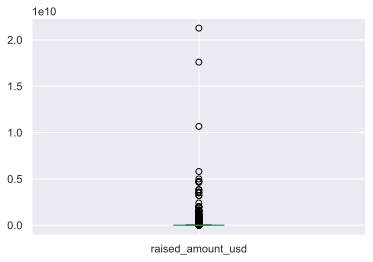

In [43]:
master['raised_amount_usd'].plot(kind='box')

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows.

In [58]:
# removing NaNs in raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

### 4.b.working with "country_code"
Let's now look at the column ```country_code```. To see the distribution of the values for categorical variables, it is best to convert them into type 'category'.

In [59]:
country_codes = master['country_code'].astype('category')

# displaying frequencies of each category
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [60]:
# viewing fractions of counts of country_codes
100*(master['country_code'].value_counts()/len(master.index))

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
         ...    
TGO     0.001053
QAT     0.001053
SEN     0.001053
PRY     0.001053
OMN     0.001053
Name: country_code, Length: 134, dtype: float64

Now, we can either delete the rows having ```country_code``` missing (about 6% rows), or we can impute them by ```USA```. Since the number 6 is quite small, and we have a decent amount of data, it may be better to just remove the rows.

**Note that** ```np.isnan``` does not work with arrays of type 'object', it only works with native numpy type (float). Thus, you can use ```pd.isnull()``` instead.

In [62]:
# removing rows with missing country_codes
master = master[~pd.isnull(master['country_code'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Note that the fraction of missing values in the remaining dataframe has also reduced now - only 0.65% in category_list. Let's thus remove those as well.

**Note:** Optionally, you could have simply let the missing values in the dataset and continued the analysis. There is nothing wrong with that. But in this case, since we will use that column later for merging with the 'main_categories', removing the missing values will be quite convenient (and again - we have enough data).

In [63]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

##### After missing data

In [64]:
# after missing value treatment, approx 77% observations are retained
100*(len(master.index) / len(rounds.index))

77.01589400516751

after missing value treatment, approx 77% observations are retained

In [65]:
master.to_csv('master_data.csv')

# END of Cleaning process